# Recurent Neural Network

## 1. Import Library & Load Data MNIST

In [1]:
# import library
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_img (img):
  img = img.reshape ((28,28))
  #(28,28) dibuat menjadi tupple dengan ukuran 28x28 sehingga dituliskan ((28,28))
  plt.imshow(img)

In [3]:
# download data mnist dari data tensor flow. 
# mnist adalah data tulisan tangan dari angka 0 sampai angka 9

(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 24s 2us/step


## 2. Re-Shape, Re-Type, One-Hot-Encoder

In [4]:
# reshape X_train yang awalnya adalah matriks ( 60000 x (28 x 28) )  menjadi matriks (60000,784)
# reshape X_test yang awalnya adalah matriks ( 10000 x (28 x 28) )  menjadi matriks (60000,784)
X_train = X_train.reshape (60000,784)
X_test = X_test.reshape (10000, 784)

In [5]:
# re-type menjadi float number, dan update menjadi (data/maximal value of data). nilai terbesar X adalah 255, maka kita akan bagi dengan 255. 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255 

In [ ]:
#onehotencoding untuk nilai y nya. Karena nilai y adalah dari 0 sampai 9, maka kita akan membuat encoder sampai dengan 10 kolom 
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

## 3. Membuat Arsitektur Jaringan

In [7]:
# coba pikirkan hidden layers nya. ini hyperparameter. jadi bebas bisa dipilih yang terbaik. 

# Misalkan : 
# feature n = 784
# first hidden layer n = 512
# second hidden layer n = 256
# output nya 10

model = tf.keras.Sequential()
# hidden layers pertama dengan menggunakan relu
model.add(tf.keras.layers.Dense(512, activation='relu',input_shape=(784,)))

#hidden layers kedua dengan menggunakan relu lagi
model.add(tf.keras.layers.Dense(256, activation='relu'))

#membuat output
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# softmax adalah activation function yang dapat mengambil yang paling besar nilainya, 
# sama dengan kan dengan satu. sementara nilai lain adalah nol. 

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# result yang lebih dari 2 maka pakai 'categorical_crossentropy'. 
# kalo hanya 2 ( 1 dan 0 ) pakai binary saja. 


In [8]:
# training dengan membuat batch, dengan jumlah batch 128 batchs, agar iterasi lebih cepat. 
# nanti akan diiterasi sehingga seluruh data akan di-train. 
# Fitting the ANN to the Training set
H = model.fit(X_train, y_train,epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2291 - accuracy: 0.9330
Epoch 2/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0835 - accuracy: 0.9740
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0541 - accuracy: 0.9831
Epoch 4/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0365 - accuracy: 0.9883
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0255 - accuracy: 0.9914
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0233 - accuracy: 0.9923
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0173 - accuracy: 0.9941
Epoch 8/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0168 - accuracy: 0.9947
Epoch 9/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0115 - accuracy: 0.9963
Epoch 10/10
60

In [9]:
# evaluate
loss, accuracy = model.evaluate (X_test, y_test, verbose = 0)
print ("Acc: ", accuracy)

Acc:  0.9825


In [10]:
print ("loss: ", loss)

loss:  0.07879011080500103


## 4. Check pada Salah Satu Image

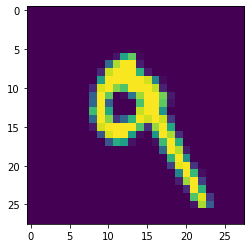

In [13]:
show_img(X_test[7])

In [14]:
scores = model.predict(X_test[7:8])
# [7:8] untuk memunculkan dalam bentuk np array bukan list
print(np.argmax(scores))
# print untuk memunculkan result
# argmax untuk memunculkan arg paling maximal

9


## 6. Evaluate Model

### 6.1 Evaluasi dengan Menggunakan K-Fold Cross Validation

![image](KFOLD.png)

Dengan menggunakan K-Fold Cross Validation, seharusnya nilai akurasi akan semakin tinggi. Karena Training set dibagi menjadi :
1. Training-folds dan 
2. Test-fold. 

Lalu dibuat banyak iterasi tergantung validation_splitnya. Contohnya jika kita gunakan validation_split = 0.33, artinya, kita akan membagi training set menjadi 3 bagian. Setelah itu kita akan lakukan sebanyak 3 kali iterasi untuk training. 

In [15]:
H = model.fit(X_train, y_train,validation_split = 0.33 ,epochs=10, batch_size=128)

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 2s 56us/sample - loss: 0.0128 - accuracy: 0.9954 - val_loss: 0.0121 - val_accuracy: 0.9957
Epoch 2/10
40199/40199 [==============================] - 2s 54us/sample - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.0225 - val_accuracy: 0.9925
Epoch 3/10
40199/40199 [==============================] - 2s 54us/sample - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.0154 - val_accuracy: 0.9944
Epoch 4/10
40199/40199 [==============================] - 2s 55us/sample - loss: 0.0069 - accuracy: 0.9975 - val_loss: 0.0268 - val_accuracy: 0.9924
Epoch 5/10
40199/40199 [==============================] - 2s 54us/sample - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.0266 - val_accuracy: 0.9919
Epoch 6/10
40199/40199 [==============================] - 2s 54us/sample - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0400 - val_accuracy: 0.9884
Epoch 7/10
40199/40199 [==============================] 

In [16]:
# evaluate
loss, accuracy = model.evaluate (X_test, y_test, verbose = 0)
print ("Acc: ", accuracy)
print ("Loss: ", loss)

Acc:  0.983
Loss:  0.08875985607757168


**Terlihat bahwa dengan K-Fold Cross Validation, maka nilai akurasi akan meningkat dibandingkan sebelumnya**

### 6.2 Evaluasi dengan Menggunakan *Stratified* K-Fold Cross Validation

![image](StratifiedKFOLD.jpg)

In [17]:
from sklearn.model_selection import StratifiedKFold 
# menggunakan stratifiedKFold karena input kita ada banyak, kalo cuman 1 input bisa menggunakan kfold biasa

In [19]:
# download data mnist dari data tensor flow. 
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

# reshape X_train dan X_test
X_train = X_train.reshape (60000,784)
X_test = X_test.reshape (10000, 784)

# re-type menjadi float number, dan update menjadi (data/maximal value of data). nilai terbesar X adalah 255, maka kita akan bagi dengan 255. 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255 

# membuat arsitektur jaringan
model = tf.keras.Sequential()

# hidden layers pertama dengan menggunakan relu
model.add(tf.keras.layers.Dense(512, activation='relu',input_shape=(784,)))

#hidden layers kedua dengan menggunakan relu lagi
model.add(tf.keras.layers.Dense(256, activation='relu'))

#membuat output
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#softmax adalah activation function yang ambil yang paling besar, sama dengan kan dengan satu. sementara nilai lain adalah nol. 

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cvscores=[]
kfold=StratifiedKFold(n_splits=10, shuffle= True)
for train, test in kfold.split(X_train, y_train):
  y_train_train = tf.keras.utils.to_categorical(y_train[train],10)
  y_train_test = tf.keras.utils.to_categorical(y_train[test],10)
  model.fit(X_train[train], y_train_train, epochs=10, batch_size=128, verbose=0 )
  scores = model.evaluate(X_train[[test]], y_train_test)
  print("%s : %.2f%%" %(model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1]*100)
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores), np.std(cvscores)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


6006/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy : 98.02%
6003/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy : 99.07%
6001/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy : 99.73%
6000/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy : 99.88%
6000/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy : 99.68%
5999/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy : 99.82%
5999/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy : 99.92%
5999/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy : 99.73%
5997/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy : 99.87%
5996/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy : 100.00%
99.57% (+/- 0.57%)


**Terlihat saat menggunakan Stratified K-FOLD Cross Validation, akurasi model menjadi 100%**